In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des données

Après lecture des informations sur les colonnes, on choisis des noms de colonnes pour les données

In [12]:
from pathlib import Path
data_path = Path(r"../data/welddb.data")
column_names = [
    'C', 'Si', 'Mn', 'S', 'P', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Co', 'W', 
    'O', 'Ti', 'N', 'Al', 'B', 'Nb', 'Sn', 'As', 'Sb', 
    'Current', 'Voltage', 'AC_DC', 'Electrode_polarity', 'Heat_input', 'Interpass_temp',  
    'Weld_type', 'PWHT_temp', 'PWHT_time', 
    'Yield_strength', 'UTS', 'Elongation', 'Reduction_area',  
    'Charpy_temp', 'Charpy_impact', 'Hardness', 'FATT_50', 
    'Primary_ferrite', 'Ferrite_2nd_phase', 'Acicular_ferrite', 'Martensite', 'Ferrite_carbide', 
    'Weld_ID' 
]
df = pd.read_csv(data_path, sep='\s+', names=column_names)
df.head(5)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\quent\AppData\Local\Temp\ipykernel_37836\14694824.py:13: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data_path, sep='\s+', names=column_names)


,C,Si,Mn,S,P,Ni,Cr,Mo,V,Cu,...,Charpy_temp,Charpy_impact,Hardness,FATT_50,Primary_ferrite,Ferrite_2nd_phase,Acicular_ferrite,Martensite,Ferrite_carbide,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


On remarque que toutes les valeurs vide sont notées "N" donc on les remplaces par NaN

In [13]:
df.replace('N', np.nan, inplace=True)
df.head(5)

,C,Si,Mn,S,P,Ni,Cr,Mo,V,Cu,...,Charpy_temp,Charpy_impact,Hardness,FATT_50,Primary_ferrite,Ferrite_2nd_phase,Acicular_ferrite,Martensite,Ferrite_carbide,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,NaN,NaN,NaN,NaN,...,-28,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,NaN,NaN,NaN,NaN,...,-38,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,NaN,NaN,NaN,NaN,...,-48,100,NaN,NaN,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


# Data Cleaning


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   C                   1652 non-null   float64
 1   Si                  1652 non-null   float64
 2   Mn                  1652 non-null   float64
 3   S                   1648 non-null   object 
 4   P                   1642 non-null   object 
 5   Ni                  697 non-null    object 
 6   Cr                  784 non-null    object 
 7   Mo                  793 non-null    object 
 8   V                   928 non-null    object 
 9   Cu                  578 non-null    object 
 10  Co                  129 non-null    object 
 11  W                   75 non-null     object 
 12  O                   1256 non-null   object 
 13  Ti                  935 non-null    object 
 14  N                   1242 non-null   object 
 15  Al                  905 non-null    object 
 16  B     

On remarque que beaucoup de colonnes ont une majorité de valeurs manquantes. Nous allons nous débarasser de ces valeurs car elles sont trop peu exploitables, sauf pour les données chimiques car on peut imaginer que si elles sont à NaN c'est qu'elles ne sont pas mesurées car normalement introuvable de plus on remarque que dans les données, il y a parfois des "< seuil" ou des "54totndres" on va donc remplacer ces valeurs par 0 aussi.

In [35]:
chemical_cols = ['C','Si','Mn','S','P','Ni','Cr','Mo','V','Cu','Co',
                 'W','O','Ti','N','Al','B','Nb','Sn','As','Sb']

df_reduced = df.copy()
# Si colonne pas dans chemical_cols et mean < 0.5 on supprime la colonne
for col in df_reduced.columns:
    if col not in chemical_cols and df_reduced[col].isna().mean() > 0.5:
        df_reduced.drop(columns=[col], inplace=True)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   C                   1652 non-null   float64
 1   Si                  1652 non-null   float64
 2   Mn                  1652 non-null   float64
 3   S                   1648 non-null   object 
 4   P                   1642 non-null   object 
 5   Ni                  697 non-null    object 
 6   Cr                  784 non-null    object 
 7   Mo                  793 non-null    object 
 8   V                   928 non-null    object 
 9   Cu                  578 non-null    object 
 10  Co                  129 non-null    object 
 11  W                   75 non-null     object 
 12  O                   1256 non-null   object 
 13  Ti                  935 non-null    object 
 14  N                   1242 non-null   object 
 15  Al                  905 non-null    object 
 16  B     

On remarque que la plupart des valeurs sont de class "object" on va donc les modifier pour avoir les valeurs numériques en float afin de pouvoir faire nos calculs

In [37]:
categorical_cols = ['AC_DC', 'Electrode_polarity', 'Weld_type', 'Weld_ID']

for col in df_reduced.columns:
    if col != 'Weld_ID' and col not in categorical_cols:
        df_reduced[col] = pd.to_numeric(df_reduced[col], errors='coerce') #mets les valeurs que l'on souhaitait en NaN, on pourra ensuite les metter à 0 si ce sont des colonnes chimiques
df_reduced[chemical_cols] = df_reduced[chemical_cols].fillna(0)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   C                   1652 non-null   float64
 1   Si                  1652 non-null   float64
 2   Mn                  1652 non-null   float64
 3   S                   1652 non-null   float64
 4   P                   1652 non-null   float64
 5   Ni                  1652 non-null   float64
 6   Cr                  1652 non-null   float64
 7   Mo                  1652 non-null   float64
 8   V                   1652 non-null   float64
 9   Cu                  1652 non-null   float64
 10  Co                  1652 non-null   float64
 11  W                   1652 non-null   float64
 12  O                   1652 non-null   float64
 13  Ti                  1652 non-null   float64
 14  N                   1652 non-null   float64
 15  Al                  1652 non-null   float64
 16  B     

Après suppression des colonnes avec trop de valeurs manquantes, on peut voir qu'il reste deux colonnes qui pourraient être utiles à la prédiction. La 19 et la 20. Elles vont de paires car on remarque que une nous donne le résultat du test Charpy et l'autre la température à laquelle à été réalisée ce test. Après avoir vérifié si leurs valeures manquantes sont sur les mêmes lignes, on peut créer notre colonne qui nous servira de prédiction (Y) qui peut être le "Charpy_impact / Charpy_temp" avec une conversion de la température en Kelvin pour éviter la division par 0. Cette nouvelle grandeur exprime donc la ténacité relative de la soudure, c’est-à-dire sa capacité à absorber de l’énergie par unité de température, indépendamment des conditions du test.


In [38]:
if (df_reduced['Charpy_impact'].isna() == df_reduced['Charpy_temp'].isna()).all():
    df_reduced['Impact_per_temp'] = df_reduced['Charpy_impact'] / (df_reduced['Charpy_temp'] + 273.15)

On pourra supprimer ces deux colonnes pour la phase d'entrainement du modèle

In [39]:
df_reduced.describe()

,C,Si,Mn,S,P,Ni,Cr,Mo,V,Cu,...,Sb,Current,Voltage,Heat_input,Interpass_temp,PWHT_temp,PWHT_time,Charpy_temp,Charpy_impact,Impact_per_temp
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1404.000000,1404.000000,1652.000000,1614.000000,1639.000000,1639.000000,879.000000,879.00000,879.000000
mean,0.075521,0.328577,1.202821,0.009498,0.012874,0.175108,0.997214,0.230002,0.027188,0.060151,...,4.327228,283.843661,27.607379,1.700987,204.902726,304.674192,5.049652,-34.606371,87.68942,0.360407
std,0.023898,0.112455,0.382137,0.011229,0.019593,0.550553,2.333634,0.408268,0.068649,0.207850,...,17.314885,192.560955,12.555629,1.298465,39.550604,285.498003,6.096034,34.738624,50.11670,0.186006
min,0.029000,0.040000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,115.000000,11.500000,0.600000,20.000000,0.000000,0.000000,-114.000000,3.00000,0.014075
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,170.000000,21.000000,1.000000,200.000000,0.000000,0.000000,-60.000000,38.00000,0.162347
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,170.000000,21.000000,1.000000,200.000000,250.000000,2.000000,-40.000000,100.00000,0.407914
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.030000,0.402500,0.270000,0.010000,0.000000,...,0.000000,300.000000,30.000000,2.000000,200.000000,580.000000,10.000000,-17.500000,100.00000,0.469153
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,200.000000,900.000000,75.360000,7.900000,300.000000,760.000000,24.000000,188.000000,270.00000,0.908632


In [42]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   C                   1652 non-null   float64
 1   Si                  1652 non-null   float64
 2   Mn                  1652 non-null   float64
 3   S                   1652 non-null   float64
 4   P                   1652 non-null   float64
 5   Ni                  1652 non-null   float64
 6   Cr                  1652 non-null   float64
 7   Mo                  1652 non-null   float64
 8   V                   1652 non-null   float64
 9   Cu                  1652 non-null   float64
 10  Co                  1652 non-null   float64
 11  W                   1652 non-null   float64
 12  O                   1652 non-null   float64
 13  Ti                  1652 non-null   float64
 14  N                   1652 non-null   float64
 15  Al                  1652 non-null   float64
 16  B     

# PCA

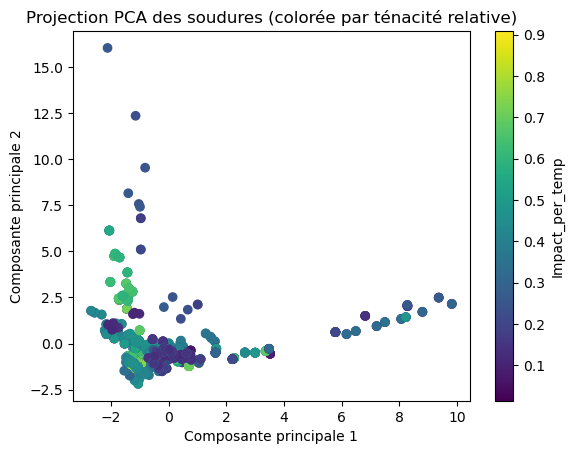

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

chemical_cols = ['C', 'Si', 'Mn', 'S', 'P', 'Ni', 'Cr', 'Mo', 'V',
                 'Cu', 'Co', 'W', 'O', 'Ti', 'N', 'Al', 'B', 'Nb', 
                 'Sn', 'As', 'Sb']
df_valid = df_reduced.dropna(subset=['Impact_per_temp'])

X = df_valid[chemical_cols]

# Normalisation
X_scaled = StandardScaler().fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df_reduced.loc[X.index,'Impact_per_temp'], cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection PCA des soudures (colorée par ténacité relative)')
plt.colorbar(label='Impact_per_temp')
plt.show()


On observe avec l'ACP sur les variables chimiques, que les soudures ne forment pas de groupes distincts dans l’espace des deux premières composantes principales.
Cela suggère que la composition chimique, à elle seule, ne suffit pas à discriminer clairement les soudures selon leur qualité mécanique.

Toutefois, la coloration par la ténacité relative (Impact_per_temp) met en évidence un léger gradient : certaines zones du plan PCA regroupent des soudures plus tenaces. Cela indique une influence partielle de la chimie sur la ténacité, mais probablement combinée à d’autres facteurs tels que les paramètres de soudage ou les traitements thermiques.

Ainsi, un modèle prédictif devra intégrer à la fois la composition chimique et les paramètres de procédé.

# Corrélation

Variables les plus positivement corrélées :
Impact_per_temp    1.000000
Charpy_impact      0.965521
Interpass_temp     0.266590
Charpy_temp        0.265983
Sb                 0.112530
Sn                 0.068663
As                 0.054138
Ti                 0.009223
Si                -0.001624
Mn                -0.025923
Name: Impact_per_temp, dtype: float64

Variables les plus négativement corrélées :
P            -0.146589
Current      -0.151122
Nb           -0.155099
Heat_input   -0.194914
Mo           -0.209531
Cr           -0.224753
V            -0.257714
N            -0.299254
O            -0.318912
W                  NaN
Name: Impact_per_temp, dtype: float64


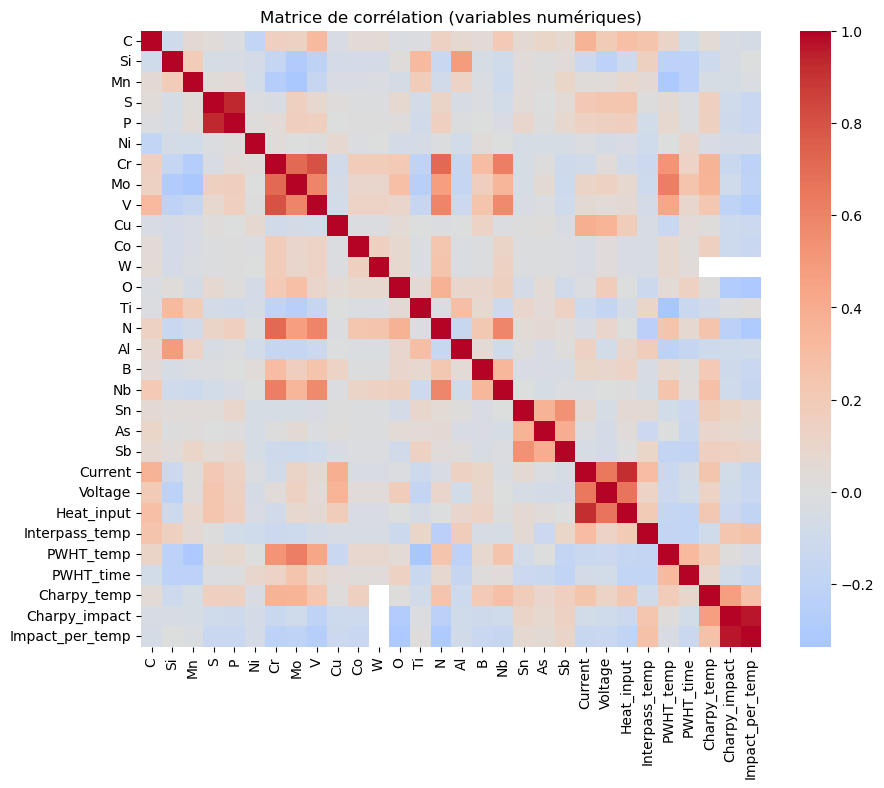

C:\Users\quent\AppData\Local\Temp\ipykernel_37836\3264976732.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


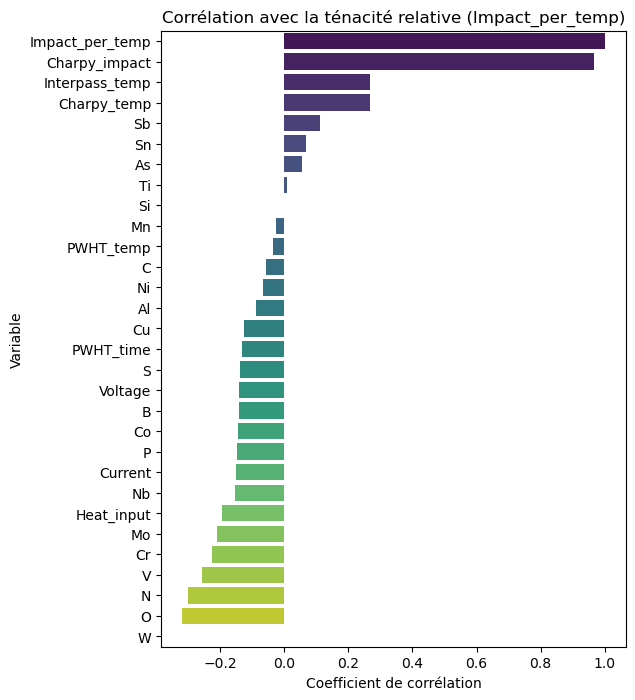

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# On garde uniquement les colonnes numériques
numeric_df = df_reduced.select_dtypes(include='number')

# Calcul du coefficient de corrélation avec la cible
corr = numeric_df.corr(numeric_only=True)['Impact_per_temp'].sort_values(ascending=False)

# Affichage des 10 plus corrélées
print("Variables les plus positivement corrélées :")
print(corr.head(10))
print("\nVariables les plus négativement corrélées :")
print(corr.tail(10))

# Visualisation globale (heatmap simplifiée)
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

# Visualisation ciblée sur la cible
plt.figure(figsize=(6,8))
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title("Corrélation avec la ténacité relative (Impact_per_temp)")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variable")
plt.show()
